# Assignment4_ML_Meitong Chen

### Group 3: Yuewen Shen, Meitong Chen, Jie Zhu

# Question 2: Data Preprocessing and Merging
## Question 1 is after Question 2

In [1]:
# import libraries
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats


In [2]:
# read the medical data
medical = pd.read_csv('C:/Users/win/Desktop/medical.csv')

# drop duplicated rows
medical = medical.drop_duplicates()

# choose the age from 40 - 75
medical = medical[(medical['patient_age'] >= 40) & (medical['patient_age'] <= 75)]
medical

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,place_of_service,...,diag_4,diag_5,rev_center_code,rev_center_units,proc_code,proc_modifier,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,2020-07-13,CA,922.0,55.0,M,Home,...,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
2,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3074F,NaN,1.0,0.00,0.00,46.57
3,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3078F,NaN,1.0,0.00,0.00,56.38
4,00006d564a4718c744f1bbf1b6c5f8c3,42ba4419d9ad7c9293d76686fb608f10,9e4534892128401c693a6ab2ea758cd6a0a6484972168b...,da5cef18317c14180ed561a84001d8a033d724d541a2c0...,2023-08-11,CA,900.0,55.0,F,Independent Laboratory,...,NaN,NaN,NaN,1.0,80053,NaN,1.0,88.07,88.07,15.16
5,00006d564a4718c744f1bbf1b6c5f8c3,cad5e8635fd011bfec2b65d161b15254,3b0f0f71ac05c34ab9307c4853f1af59420c07b522cdf2...,eafff3ebf33ebe534edc66e761d9b52d1381653d9d0d57...,2019-11-01,CA,900.0,50.0,F,Office,...,M4317,N200,NaN,1.0,72072,NaN,1.0,107.00,107.00,72.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623520,1fffbb8b7e6a6c38cf97dafe3c5bc1cc,68f555e03ccddc02c78db02eab162c73,c45c2ba5fa8c97f5dd9e39064496898a54e7c82624ac9e...,c571d6153d7948e36a32fdc69dd974676473d9496772a6...,2023-01-04,CA,922.0,50.0,M,Office,...,K449,NaN,NaN,1.0,99213,NaN,1.0,175.00,175.00,83.22
623521,1fffbb8b7e6a6c38cf97dafe3c5bc1cc,901768130f3fc48d286006e179eab339,a6cd72b2886f6ca2214157a2771350882833506a015485...,580d82dacaf2959c6577a83d5dd9330710f3205e11a571...,2019-05-21,CA,922.0,45.0,M,Office,...,NaN,NaN,NaN,1.0,1159F,NaN,1.0,0.00,0.00,44.68
623522,1fffbb8b7e6a6c38cf97dafe3c5bc1cc,901768130f3fc48d286006e179eab339,a6cd72b2886f6ca2214157a2771350882833506a015485...,580d82dacaf2959c6577a83d5dd9330710f3205e11a571...,2019-05-21,CA,922.0,45.0,M,Office,...,NaN,NaN,NaN,1.0,3080F,NaN,1.0,0.00,0.00,41.93
623523,1fffbb8b7e6a6c38cf97dafe3c5bc1cc,901768130f3fc48d286006e179eab339,a6cd72b2886f6ca2214157a2771350882833506a015485...,580d82dacaf2959c6577a83d5dd9330710f3205e11a571...,2019-05-21,CA,922.0,45.0,M,Office,...,NaN,NaN,NaN,1.0,3077F,NaN,1.0,0.00,0.00,45.01


In [3]:
# col names
medical.columns

Index(['journey_id', 'episode_id', 'visit_id', 'encounter_id', 'claim_date',
       'patient_state', 'patient_short_zip', 'patient_age', 'patient_gender',
       'place_of_service', 'visit_type', 'payor', 'payor_channel', 'ref_npi',
       'hcp_npi', 'hcp_taxonomy', 'hcp_specialty', 'hco_npi', 'hcp_npi_list',
       'hco_npi_list', 'diag_list', 'diag_1', 'diag_2', 'diag_3', 'diag_4',
       'diag_5', 'rev_center_code', 'rev_center_units', 'proc_code',
       'proc_modifier', 'proc_units', 'line_charge', 'claim_charge',
       'smart_allowed'],
      dtype='object')

In [4]:
# rate of na
missing_value_ratio = (medical.isna().sum() / len(medical)) * 100
missing_value_ratio = missing_value_ratio[missing_value_ratio > 0]
print(missing_value_ratio)

visit_id              0.218944
patient_short_zip     0.002370
place_of_service     21.068578
visit_type            3.533184
payor                 2.389425
payor_channel         6.179472
ref_npi              51.634515
hcp_npi              29.672842
hcp_taxonomy         30.674224
hcp_specialty        30.672765
hco_npi               0.930284
hcp_npi_list         29.672842
hco_npi_list          0.930284
diag_list             0.145477
diag_1                0.145477
diag_2               26.137288
diag_3               41.420165
diag_4               52.155168
diag_5               67.233503
rev_center_code      82.699046
rev_center_units      0.234075
proc_code             3.156732
proc_modifier        73.489359
proc_units            0.294235
dtype: float64


In [5]:
# drop unnecessary cols
medical.drop(columns=['episode_id', 'visit_id', 'encounter_id', 'patient_state', 'payor', 'payor_channel','hcp_npi','hcp_taxonomy', 'place_of_service', 
                      'hcp_specialty','hco_npi','hcp_npi_list','hco_npi_list', 'rev_center_units', 'line_charge', 'claim_charge'], inplace=True)

# drop more than 50% na cols
medical.drop(columns=['ref_npi', 'rev_center_code', 'proc_modifier'], inplace=True)

# drop rows for na if the cols are necessary
medical.dropna(subset=['patient_short_zip', 'visit_type', 'diag_1','proc_code'], inplace=True)

# mean value to fill na
mean_imputer = SimpleImputer(strategy='mean')
for column in ['proc_units']:
    medical[column] = np.round(mean_imputer.fit_transform(medical[[column]])).astype(int)

print(medical.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512915 entries, 0 to 623524
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         512915 non-null  object 
 1   claim_date         512915 non-null  object 
 2   patient_short_zip  512915 non-null  float64
 3   patient_age        512915 non-null  float64
 4   patient_gender     512915 non-null  object 
 5   visit_type         512915 non-null  object 
 6   diag_list          512915 non-null  object 
 7   diag_1             512915 non-null  object 
 8   diag_2             377725 non-null  object 
 9   diag_3             296742 non-null  object 
 10  diag_4             239828 non-null  object 
 11  diag_5             159541 non-null  object 
 12  proc_code          512915 non-null  object 
 13  proc_units         512915 non-null  int32  
 14  smart_allowed      512915 non-null  float64
dtypes: float64(3), int32(1), object(11)
memory usage: 6

In [6]:
# change into datetime format
medical['claim_date'] = pd.to_datetime(medical['claim_date'])

# change into string
medical['patient_short_zip'] = medical['patient_short_zip'].astype(str)

### Exploration on Medical Data

In [7]:
# analyze diagnosis codes
diag_columns = [col for col in medical.columns if col.startswith('diag_')]
df_diag = medical[diag_columns]

combined_list = df_diag.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

# count the first three 
first_three_counts = {}
for diag_code in combined_list:
    first_three = diag_code[:3]
    first_three_counts[first_three] = first_three_counts.get(first_three, 0) + 1

sorted_counts = sorted(first_three_counts.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts:
    print(items)

('E11', 194300)
('I10', 169170)
('E78', 96020)
('Z00', 80183)
('E66', 56002)
('Z68', 45320)
('M25', 44814)
('M54', 42778)
('Z12', 28484)
('N18', 27019)
('Z01', 27012)
('Z13', 25366)
('M79', 25199)
('E55', 23510)
('R10', 23359)
('Z79', 22730)
('Z71', 22292)
('R73', 21339)
('G47', 21241)
('R07', 20848)
('E03', 20300)
('N39', 18212)
('M17', 18106)
('D64', 16716)
('R53', 14001)
('I25', 14000)
('Z20', 13895)
('R06', 12983)
('Z23', 11966)
('I50', 11313)
('F41', 10517)
('J44', 10107)
('K21', 9850)
('I48', 9743)
('Z11', 9743)
('G89', 9606)
('N40', 9208)
('M19', 8541)
('J45', 8348)
('I11', 8281)
('R68', 8030)
('M47', 8017)
('D50', 7927)
('F33', 7909)
('R05', 7594)
('M51', 7435)
('F32', 6819)
('E87', 6809)
('B35', 6761)
('I12', 6620)
('R79', 6598)
('U07', 6367)
('R42', 6186)
('R51', 6121)
('H25', 6088)
('Z51', 6059)
('K76', 5811)
('R00', 5606)
('L03', 5567)
('C50', 5541)
('R94', 5507)
('M48', 5350)
('Z76', 5327)
('L97', 5290)
('M99', 5234)
('I70', 5161)
('Z86', 5154)
('J96', 5054)
('F17', 4980)


In [8]:
# choose patients with obesity or hypertension and only include ones after Ozempic's approval date
medical = medical[(medical['diag_1'].str.contains('E11|I10', na=False)) |
                 (medical['diag_2'].str.contains('E11|I10', na=False)) |
                 (medical['diag_3'].str.contains('E11|I10', na=False)) |
                 (medical['diag_4'].str.contains('E11|I10', na=False)) |
                 (medical['diag_5'].str.contains('E11|I10', na=False))]

medical = medical[medical['claim_date'] > '2017-12-05']
medical

,journey_id,claim_date,patient_short_zip,patient_age,patient_gender,visit_type,diag_list,diag_1,diag_2,diag_3,diag_4,diag_5,proc_code,proc_units,smart_allowed
6,00006d564a4718c744f1bbf1b6c5f8c3,2022-09-16,900.0,50.0,F,outpatient visit,"R9431,E039,I10,Z6825",R9431,E039,I10,Z6825,NaN,1159F,1,44.68
10,00006d564a4718c744f1bbf1b6c5f8c3,2022-09-16,900.0,50.0,F,outpatient visit,"R9431,E039,I10,Z6825",R9431,E039,I10,Z6825,NaN,3008F,1,48.46
13,00006d564a4718c744f1bbf1b6c5f8c3,2022-09-16,900.0,50.0,F,outpatient visit,"R9431,E039,I10,Z6825",R9431,E039,I10,Z6825,NaN,1160F,1,42.00
16,00006d564a4718c744f1bbf1b6c5f8c3,2022-09-28,900.0,50.0,F,outpatient visit,"N200,I10,E039",N200,I10,E039,NaN,NaN,50432,1,429.73
17,00006d564a4718c744f1bbf1b6c5f8c3,2019-11-01,900.0,50.0,F,laboratory visit,"E7800,E039,I10,R809",E7800,E039,I10,R809,NaN,80053,1,15.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623492,1fff36b69093f3ece1c2426183acaf31,2020-12-19,910.0,65.0,F,outpatient visit,"R918,I10",R918,I10,NaN,NaN,NaN,71046,1,99.16
623506,1fff36b69093f3ece1c2426183acaf31,2020-02-18,910.0,65.0,F,outpatient visit,"E6601,I10,Z6839,I2510,J449",E6601,I10,Z6839,I2510,J449,99214,1,106.45
623509,1fff36b69093f3ece1c2426183acaf31,2020-04-29,910.0,65.0,F,outpatient visit,"I442,I10,J45909,K219,Z7982,Z79899",I442,I10,J45909,K219,Z7982,93005,2,245.50
623519,1fffbb8b7e6a6c38cf97dafe3c5bc1cc,2022-07-01,922.0,45.0,M,outpatient visit,I10,I10,NaN,NaN,NaN,NaN,76775,1,128.82


In [9]:
# read script data
scripts = pd.read_csv('C:/Users/win/Desktop/scripts.csv')

# dtop duplicated rows
scripts = scripts.drop_duplicates()
scripts

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,journey_id,cohort_id,claim_id,patient_gender,patient_state,patient_zip,patient_dob,pharmacy_npi,pharmacist_npi,prescriber_npi,...,bin,plan_pay,reject_code_1,reject_code_3,reject_code_4,reject_code_5,ndc,active,start_date,end_date
0,00006390c96ebfffed580074c35a16a7,16,60618bd8d37311da702bf9349e76f8c26d515c082e136f...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,47335067381,True,190001,None
1,00006390c96ebfffed580074c35a16a7,16,dbeb47defd161331e43f4e359e8d43e4ef7546ff58359b...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,47335067381,True,190001,None
2,00006390c96ebfffed580074c35a16a7,16,02927d081fad10afffcba79bad27f94ff52c98e968aaec...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,47335067381,True,190001,None
3,00006390c96ebfffed580074c35a16a7,16,a412c986e2503a5140ed1482e88b5ec50feeedaf2d89ec...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,47335067381,True,190001,None
4,00006390c96ebfffed580074c35a16a7,16,b65634edd78998753fe9606b142b2fff7765d6c576973c...,M,CA,922,1961-01-01,1215361126,None,1750479168,...,022659,NaN,None,None,None,None,65862059805,True,190001,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894618,1fff19f39322d5c25a60259f30d937a4,16,00b40574911dfaacbd19f8db7641673031b4738cc71838...,M,CA,922,1965-01-01,1497325211,None,1982176947,...,022659,555.84,None,None,None,None,310621030,True,190001,None
894619,1fff19f39322d5c25a60259f30d937a4,16,e75d345e22e26ceed179784cca7cec1fbc942c45fed1e0...,M,CA,922,1965-01-01,1497325211,None,1982176947,...,022659,555.84,None,None,None,None,310621030,True,190001,None
894620,1fff19f39322d5c25a60259f30d937a4,16,861149b8edac30aa231d2c3c26bdb8a8e018f0959e79f0...,M,CA,922,1965-01-01,1497325211,None,1982176947,...,022659,555.84,None,None,None,None,310621030,True,190001,None
894621,1fff19f39322d5c25a60259f30d937a4,16,fda3169542011ad3251f1afcd49626bdc4608f29c05ef5...,M,CA,922,1965-01-01,1497325211,None,1982176947,...,022659,15.72,None,None,None,None,65862020299,True,190001,None


In [10]:
# col names
scripts.columns

Index(['journey_id', 'cohort_id', 'claim_id', 'patient_gender',
       'patient_state', 'patient_zip', 'patient_dob', 'pharmacy_npi',
       'pharmacist_npi', 'prescriber_npi', 'primary_care_npi', 'group_id',
       'date_of_service', 'date_authorized', 'transaction_type',
       'date_prescription_written', 'ndc11', 'ndc11_original',
       'number_of_refills_authorized', 'diagnosis_code', 'diagnosis_code_type',
       'quantity_prescribed_original', 'quantity_dispensed',
       'place_of_service', 'is_service', 'level_of_service', 'fill_number',
       'days_supply', 'unit_of_measure', 'daw_code',
       'prior_authorization_type_code', 'is_compound_drug', 'coupon_type',
       'coupon_value_amount', 'pharmacy_submitted_cost', 'patient_pay',
       'copay_coinsurance', 'pcn', 'bin', 'plan_pay', 'reject_code_1',
       'reject_code_3', 'reject_code_4', 'reject_code_5', 'ndc', 'active',
       'start_date', 'end_date'],
      dtype='object')

In [11]:
# rate for na
missing_value_ratio = (scripts.isna().sum() / len(scripts)) * 100
missing_value_ratio = missing_value_ratio[missing_value_ratio > 0]
print(missing_value_ratio)

number_of_refills_authorized      5.048635
diagnosis_code                    9.015771
quantity_prescribed_original     64.056347
quantity_dispensed                0.000784
unit_of_measure                   0.473254
daw_code                         74.127201
prior_authorization_type_code    30.834798
coupon_value_amount              99.999440
pharmacy_submitted_cost          12.261163
patient_pay                      32.718857
copay_coinsurance                54.011014
pcn                               0.000672
plan_pay                         45.025017
dtype: float64


In [12]:
# remove unnecessary cols
scripts.drop(columns=['cohort_id', 'patient_gender', 'patient_state', 'patient_zip', 'patient_dob', 'date_authorized', 'pharmacy_npi', 'pharmacist_npi', 
                      'prescriber_npi', 'primary_care_npi', 'group_id', 'transaction_type', 'ndc11', 'ndc11_original', 
                      'place_of_service', 'is_service', 'level_of_service', 'unit_of_measure', 'prior_authorization_type_code', 
                      'coupon_type', 'patient_pay', 'pcn','plan_pay', 'reject_code_1', 'reject_code_3', 'reject_code_4', 'reject_code_5', 'ndc', 
                      'start_date', 'end_date', 'diagnosis_code_type', 'bin', 'active'], inplace=True)

# drop more than 50% na cols
scripts.drop(columns=['quantity_prescribed_original', 'daw_code', 'coupon_value_amount', 'copay_coinsurance'], inplace=True)

# drop na rows if the features are necessary
scripts.dropna(subset=['diagnosis_code'], inplace=True)

# mean value to fill na
mean_imputer = SimpleImputer(strategy='mean')
for column in ['number_of_refills_authorized', 'quantity_dispensed','pharmacy_submitted_cost']:
    scripts[column] = np.round(mean_imputer.fit_transform(scripts[[column]])).astype(int)

print(scripts.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812844 entries, 0 to 894622
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   journey_id                    812844 non-null  object 
 1   claim_id                      812844 non-null  object 
 2   date_of_service               812844 non-null  object 
 3   date_prescription_written     812844 non-null  object 
 4   number_of_refills_authorized  812844 non-null  int32  
 5   diagnosis_code                812844 non-null  object 
 6   quantity_dispensed            812844 non-null  int32  
 7   fill_number                   812844 non-null  float64
 8   days_supply                   812844 non-null  float64
 9   is_compound_drug              812844 non-null  object 
 10  pharmacy_submitted_cost       812844 non-null  int32  
dtypes: float64(2), int32(3), object(6)
memory usage: 65.1+ MB
None


In [13]:
# change into datetime format
scripts['date_of_service'] = pd.to_datetime(scripts['date_of_service'])
scripts['date_prescription_written'] = pd.to_datetime(scripts['date_prescription_written'])

In [14]:
#  merge 
db_merged = pd.merge(medical, scripts, on='journey_id', how='inner')

# make sure the claims are after prescriptions
db_merged = db_merged[db_merged['claim_date'] > db_merged['date_prescription_written']]
db_merged

,journey_id,claim_date,patient_short_zip,patient_age,patient_gender,visit_type,diag_list,diag_1,diag_2,diag_3,...,claim_id,date_of_service,date_prescription_written,number_of_refills_authorized,diagnosis_code,quantity_dispensed,fill_number,days_supply,is_compound_drug,pharmacy_submitted_cost
11,00011020325337a2a22fb26b6492196a,2023-01-03,922.0,75.0,M,outpatient visit,"Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785",Z0000,I10,L98491,...,afd6b4b4e135a4eed78006dded3cace9350b5ed611d605...,2023-01-26,2022-10-05,2,N401,90,1.0,90.0,False,455
23,00011020325337a2a22fb26b6492196a,2023-01-03,922.0,75.0,M,outpatient visit,"Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785",Z0000,I10,L98491,...,afd6b4b4e135a4eed78006dded3cace9350b5ed611d605...,2023-01-26,2022-10-05,2,N401,90,1.0,90.0,False,455
35,00011020325337a2a22fb26b6492196a,2023-01-03,922.0,75.0,M,outpatient visit,"Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785",Z0000,I10,L98491,...,afd6b4b4e135a4eed78006dded3cace9350b5ed611d605...,2023-01-26,2022-10-05,2,N401,90,1.0,90.0,False,455
47,00011020325337a2a22fb26b6492196a,2023-01-03,922.0,75.0,M,outpatient visit,"Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785",Z0000,I10,L98491,...,afd6b4b4e135a4eed78006dded3cace9350b5ed611d605...,2023-01-26,2022-10-05,2,N401,90,1.0,90.0,False,455
59,00011020325337a2a22fb26b6492196a,2023-01-03,922.0,75.0,M,outpatient visit,"Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785",Z0000,I10,L98491,...,afd6b4b4e135a4eed78006dded3cace9350b5ed611d605...,2023-01-26,2022-10-05,2,N401,90,1.0,90.0,False,455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8549898,1fff19f39322d5c25a60259f30d937a4,2022-11-29,922.0,55.0,M,laboratory visit,"E119,R350,E790,E782",E119,R350,E790,...,db9f2341606d9e8fdfb35881c85f78b5f061b7666367f4...,2023-01-18,2022-02-20,0,None,30,0.0,30.0,False,15
8549933,1fff19f39322d5c25a60259f30d937a4,2022-11-29,922.0,55.0,M,laboratory visit,"E119,R350,E790,E782",E119,R350,E790,...,3dcaa1e43567b42aadcdaeb0b50c823e96b9153c35713f...,2023-01-18,2022-02-20,0,None,30,0.0,30.0,False,43
8549942,1fff19f39322d5c25a60259f30d937a4,2022-11-29,922.0,55.0,M,laboratory visit,"E119,R350,E790,E782",E119,R350,E790,...,db9f2341606d9e8fdfb35881c85f78b5f061b7666367f4...,2023-01-18,2022-02-20,0,None,30,0.0,30.0,False,15
8549977,1fff19f39322d5c25a60259f30d937a4,2022-11-29,922.0,55.0,M,outpatient visit,"E119,Z794,Z6836",E119,Z794,Z6836,...,3dcaa1e43567b42aadcdaeb0b50c823e96b9153c35713f...,2023-01-18,2022-02-20,0,None,30,0.0,30.0,False,43


In [15]:
# double check missing values
missing_value_ratio = (db_merged.isna().sum() / len(db_merged)) * 100
missing_value_ratio = missing_value_ratio[missing_value_ratio > 0]
print(missing_value_ratio)

diag_2     7.142215
diag_3    14.937237
diag_4    24.762453
diag_5    44.667831
dtype: float64


In [16]:
db_merged['diag'] = "Obesity or Hypertensive"
db_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702943 entries, 11 to 8549986
Data columns (total 26 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   journey_id                    object        
 1   claim_date                    datetime64[ns]
 2   patient_short_zip             object        
 3   patient_age                   float64       
 4   patient_gender                object        
 5   visit_type                    object        
 6   diag_list                     object        
 7   diag_1                        object        
 8   diag_2                        object        
 9   diag_3                        object        
 10  diag_4                        object        
 11  diag_5                        object        
 12  proc_code                     object        
 13  proc_units                    int32         
 14  smart_allowed                 float64       
 15  claim_id                      o

In [17]:
# set the treatment group with taking Ozempic
treatment_group = db_merged[db_merged['proc_code'] == "J3490"]
print(treatment_group.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 45369 to 8543212
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   journey_id                    3111 non-null   object        
 1   claim_date                    3111 non-null   datetime64[ns]
 2   patient_short_zip             3111 non-null   object        
 3   patient_age                   3111 non-null   float64       
 4   patient_gender                3111 non-null   object        
 5   visit_type                    3111 non-null   object        
 6   diag_list                     3111 non-null   object        
 7   diag_1                        3111 non-null   object        
 8   diag_2                        2577 non-null   object        
 9   diag_3                        2018 non-null   object        
 10  diag_4                        1784 non-null   object        
 11  diag_5                 

In [18]:
# set the control group without taking Ozempic
control_group = db_merged[db_merged['proc_code'] != "J3490"]
print(control_group.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2699832 entries, 11 to 8549986
Data columns (total 26 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   journey_id                    object        
 1   claim_date                    datetime64[ns]
 2   patient_short_zip             object        
 3   patient_age                   float64       
 4   patient_gender                object        
 5   visit_type                    object        
 6   diag_list                     object        
 7   diag_1                        object        
 8   diag_2                        object        
 9   diag_3                        object        
 10  diag_4                        object        
 11  diag_5                        object        
 12  proc_code                     object        
 13  proc_units                    int32         
 14  smart_allowed                 float64       
 15  claim_id                      o

Conclusion: 

I removed the duplicate rows, choose the age from 40 to 75. And deal with missing values (drop col with more than 50% na, drop rows for necessary features, and use mean value to fill the na), dropped some unnecessary columns. And did the data transformation , and analysised the diagnosis code. Then merged the data, and set the treatment and control group (proc_code = J3490 or not).


# Question 1: Exploratory Data Analysis 

### Basic Information

In [19]:
# statistics informations
summary_stats = db_merged.describe()
print(summary_stats)

        patient_age    proc_units  smart_allowed  \
count  2.702943e+06  2.702943e+06   2.702943e+06   
mean   6.198437e+01  3.993400e+00   1.870801e+02   
std    8.542613e+00  2.905388e+01   4.254908e+02   
min    4.000000e+01  0.000000e+00   0.000000e+00   
25%    5.500000e+01  1.000000e+00   3.029000e+01   
50%    6.500000e+01  1.000000e+00   7.852000e+01   
75%    7.000000e+01  1.000000e+00   1.917100e+02   
max    7.500000e+01  1.374000e+03   2.408460e+04   

       number_of_refills_authorized  quantity_dispensed   fill_number  \
count                  2.702943e+06        2.702943e+06  2.702943e+06   
mean                   2.395588e+00        6.681168e+01  9.894459e-01   
std                    4.688063e+00        1.595697e+02  1.716213e+00   
min                   -1.000000e+00        0.000000e+00  0.000000e+00   
25%                    0.000000e+00        3.000000e+01  0.000000e+00   
50%                    2.000000e+00        3.000000e+01  0.000000e+00   
75%                 

In [20]:
# choose patient_short_zip
df_zip = db_merged['patient_short_zip']

# change it into list and filter out any missing entries
combined_list = df_zip.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

# occurrences 
zips = {}
for diag_code in combined_list:
    zips[diag_code] = zips.get(diag_code, 0) + 1

# sort by count
sorted_counts = sorted(zips.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts:
    print(items)

('922.0', 905443)
('900.0', 722736)
('912.0', 315318)
('910.0', 175208)
('908.0', 153559)
('913.0', 127919)
('921.0', 127250)
('911.0', 119555)
('853.0', 16210)
('350.0', 10836)
('857.0', 10583)
('852.0', 5284)
('351.0', 4394)
('856.0', 4168)
('859.0', 1827)
('352.0', 754)
('996.0', 684)
('860.0', 648)
('863.0', 174)
('442.0', 135)
('864.0', 122)
('995.0', 115)
('923.0', 9)
('895.0', 9)
('606.0', 2)
('924.0', 1)


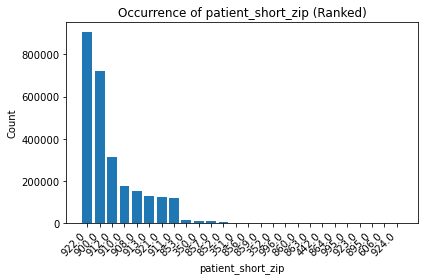

In [21]:
# labels and values
labels = [item[0] for item in sorted_counts]
values = [item[1] for item in sorted_counts]

# bar chart
plt.bar(labels, values)
plt.xlabel("patient_short_zip")
plt.ylabel("Count")
plt.title("Occurrence of patient_short_zip (Ranked)")

# size
if len(labels) > 5:  
    plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Explanation: 

For short zip code = 922.0, there are much higher number of patients than others. The counts derease as moving right along X axis, means that fewer patients come from the other zip codes. It could be related to the distribution of healthcare facilities, demographic factors, or other regional characteristics.

In [22]:
# gender and ratio
patients_gender_cnt = db_merged.groupby(['diag', 'patient_gender'])['journey_id'].nunique().reset_index(name = 'count')
total_cnt = patients_gender_cnt.groupby('diag')['count'].transform('sum')
patients_gender_cnt['gender_ratio'] = patients_gender_cnt['count']/total_cnt
patients_gender_cnt

,diag,patient_gender,count,gender_ratio
0,Obesity or Hypertensive,F,4309,0.567198
1,Obesity or Hypertensive,M,3288,0.432802


Explanation: 

Within the group of patients with Obesity or Hypertensive, there are 4,309 patient journeys for females, which represents approximately 56.72% of the total patient journeys in this diagnostic category. In contrast, there are 3,288 unique patient journeys for males, accounting for about 43.28% of the journeys. Which means that there is a higher prevalence or reporting rate of these conditions—or at least a higher number of medical engagements—as documented in the patient journeys for females compared to males.

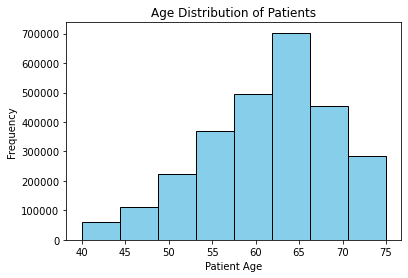

In [23]:
# hist of distr for age
plt.hist(db_merged['patient_age'], bins=8, color='skyblue', edgecolor='black')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients')

plt.show()

Explanation:

The largest frequency of patients is in the 60-65 age. The frequency then appears to decrease for patients older than 65 and is lower for patients aged 40-60. 

(array([ 959528.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1743415.]),
 array([2022. , 2022.1, 2022.2, 2022.3, 2022.4, 2022.5, 2022.6, 2022.7,
        2022.8, 2022.9, 2023. ]),
 <a list of 10 Patch objects>)

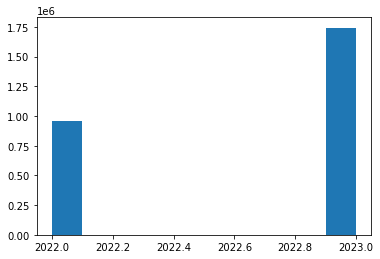

In [24]:
# Yearly Distribution of Claims
plt.hist(pd.to_datetime(db_merged['claim_date']).dt.year)

Explanation: 

There are two significant peaks in the number of claims made in the years displayed, with relatively no claims in the intervening years. Just 2022.0 and 2023.0 have number of claims.

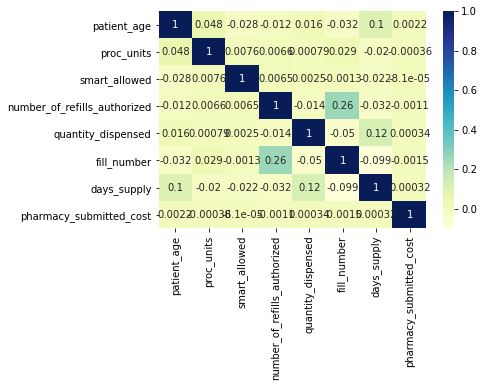

In [25]:
# heat map
corrmat = db_merged.corr()
sns.heatmap(corrmat, cmap="YlGnBu", annot = True)
plt.show()

Explanation:

Number of refills authorized and fill number, quantity dispensed and days supply, and patient age and days supply have higher correation, most other variables show weak correlation.

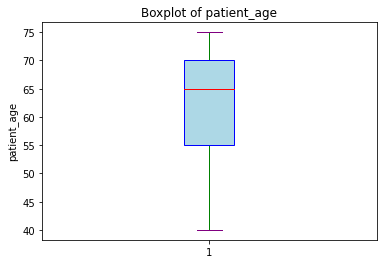

In [26]:
# boxplot for patient age
columns_to_plot = ['patient_age']

for column in columns_to_plot:
    plt.figure()
    plt.boxplot(db_merged[column], patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), 
                medianprops=dict(color='red'), whiskerprops=dict(color='green'),
                capprops=dict(color='purple'), flierprops=dict(markerfacecolor='yellow', marker='o'))
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

Explanation: 


A median age around 60 years. The absence of outliers suggests that there are no extreme values in patient ages.

### Exploration on Treatment Group

In [27]:
df_zip = treatment_group['patient_short_zip']

# a list for zip codes, exclude the na
combined_list = df_zip.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

# occurrence 
zips = {}
for diag_code in combined_list:
    #first_three = diag_code[:3]
    zips[diag_code] = zips.get(diag_code, 0) + 1
# sort by frequency
sorted_counts = sorted(zips.items(), key=operator.itemgetter(1), reverse=True)

for items in sorted_counts:
    print(items)

('922.0', 1823)
('912.0', 517)
('921.0', 319)
('910.0', 172)
('911.0', 142)
('908.0', 116)
('859.0', 22)


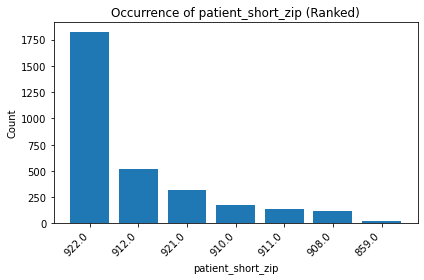

In [28]:
# label and value
labels = [item[0] for item in sorted_counts]
values = [item[1] for item in sorted_counts]

# bar chart
plt.bar(labels, values)
plt.xlabel("patient_short_zip")
plt.ylabel("Count")
plt.title("Occurrence of patient_short_zip (Ranked)")

# avoid overlap
if len(labels) > 5:  
    plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Explanation: 

922.0 has the highest count of patients, significantly more than the others. Other zip codes have progressively fewer patients, with "912.0" and "911.0" showing moderate counts, while "910.0", "908.0", and "859.0" have relatively lower occurrences.

In [29]:
# gender and ratio
patients_gender_cnt = treatment_group.groupby(['diag', 'patient_gender'])['journey_id'].nunique().reset_index(name = 'count')
total_cnt = patients_gender_cnt.groupby('diag')['count'].transform('sum')
patients_gender_cnt['gender_ratio'] = patients_gender_cnt['count']/total_cnt
patients_gender_cnt

,diag,patient_gender,count,gender_ratio
0,Obesity or Hypertensive,F,36,0.62069
1,Obesity or Hypertensive,M,22,0.37931


Explanation:

There are 36 female patients, which constitutes approximately 62.07% of the total patients within this subset. There are 22 male patients, making up about 37.93% of the total. This means that  a higher rates of medical engagement among female patients compared to male patients. 

# **Question 3: Causal Analysis Setup**

### Potential Endogeneity Issues:

(1) Omitted Variable: If there are unobserved factors that affect both the likelihood of being prescribed Ozempic and the health outcomes of interest, failing to include these variables in the analysis can bias the estimates. 

(2) Measurement Problem: If variables are measured wrongly, the relationships among the variables can be distorted. For instance, if the relationship between patients to the Ozempic treatment regimen is not accurately measured, any analysis of treatment effectiveness could be biased.

(3) Influence each other: the cause and effect influence each other. For instance, the severity of a patient’s condition may influence the decision to prescribe Ozempic.


### The method i choose: Instrumental Variables
It can be used if there is a variable that affects the probability of treatment but is not directly related to the outcome variable. The IV must satisfy two conditions: it must be correlated with the endogenous explanatory variable and uncorrelated with the error term.


### Outline of my strategy:

(1) select the ivs: find a variable that influences whether a patient receives Ozempic but does not directly affect the health outcome.

(2) collect data: Collect data on the instrument, the treatment (Ozempic prescription), and the outcome (smart_allowed), along with other relevant control variables.

(3) first stage regression: Run a regression of the endogenous explanatory variable (Ozempic prescription) on the instrument and other control variables. The goal is to demonstrate that the instrument is relevant and predicts the treatment.

(4) second stage regression: Use the predicted values of the endogenous explanatory variable from the first stage in a regression model for the outcome (smart_allowed). This is the stage where you estimate the treatment effect of Ozempic.

(5) iv validation: use the correlation between residuals of the first and second stage regressions to test the iv validation.


# Question 4: Model Development: Double-Lasso / Treatment Effect Lasso 

In [30]:
!pip install statsmodels

In [31]:
# Drop cols
columns_to_drop = ['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5']
db_merged.drop(columns=columns_to_drop, inplace=True)
db_merged.columns

Index(['journey_id', 'claim_date', 'patient_short_zip', 'patient_age',
       'patient_gender', 'visit_type', 'diag_list', 'proc_code', 'proc_units',
       'smart_allowed', 'claim_id', 'date_of_service',
       'date_prescription_written', 'number_of_refills_authorized',
       'diagnosis_code', 'quantity_dispensed', 'fill_number', 'days_supply',
       'is_compound_drug', 'pharmacy_submitted_cost', 'diag'],
      dtype='object')

In [32]:
# check first some rows
print(db_merged.head(3))


                          journey_id claim_date patient_short_zip  \
11  00011020325337a2a22fb26b6492196a 2023-01-03             922.0   
23  00011020325337a2a22fb26b6492196a 2023-01-03             922.0   
35  00011020325337a2a22fb26b6492196a 2023-01-03             922.0   

    patient_age patient_gender        visit_type  \
11         75.0              M  outpatient visit   
23         75.0              M  outpatient visit   
35         75.0              M  outpatient visit   

                                        diag_list proc_code  proc_units  \
11  Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785     93000           1   
23  Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785     3008F           1   
35  Z0000,I10,L98491,Z7189,I739,Z13820,I2510,E785     3074F           1   

    smart_allowed  ... date_of_service date_prescription_written  \
11          77.31  ...      2023-01-26                2022-10-05   
23          48.46  ...      2023-01-26                2022-10-05   
35       

In [33]:
# create the ozempic_prescribed variable
db_merged['ozempic_prescribed'] = (db_merged['proc_code'] == "J3490").astype(int)

print(db_merged['ozempic_prescribed'].value_counts())


0    2699832
1       3111
Name: ozempic_prescribed, dtype: int64


In [34]:
# change into integer
db_merged['patient_age'] = db_merged['patient_age'].astype(int)
db_merged['proc_units'] = db_merged['proc_units'].astype(int)
db_merged['quantity_dispensed'] = db_merged['quantity_dispensed'].astype(int)
db_merged['fill_number'] = db_merged['fill_number'].astype(int)
db_merged['pharmacy_submitted_cost'] = db_merged['pharmacy_submitted_cost'].astype(int)
db_merged['number_of_refills_authorized'] = db_merged['number_of_refills_authorized'].astype(int)
db_merged['days_supply'] = db_merged['days_supply'].astype(int)
db_merged['smart_allowed'] = db_merged['smart_allowed'].astype(int)
db_merged["smart_allowed"] = np.log1p(db_merged["smart_allowed"])
# change the gender into integer
gender_map = {'M': 0, 'F': 1}
db_merged['patient_gender'] = db_merged['patient_gender'].map(gender_map)
print(db_merged.dtypes)


journey_id                              object
claim_date                      datetime64[ns]
patient_short_zip                       object
patient_age                              int32
patient_gender                           int64
visit_type                              object
diag_list                               object
proc_code                               object
proc_units                               int32
smart_allowed                          float64
claim_id                                object
date_of_service                 datetime64[ns]
date_prescription_written       datetime64[ns]
number_of_refills_authorized             int32
diagnosis_code                          object
quantity_dispensed                       int32
fill_number                              int32
days_supply                              int32
is_compound_drug                        object
pharmacy_submitted_cost                  int32
diag                                    object
ozempic_presc

In [35]:
# encode the visit_type
is_compound_drug_summary = db_merged['visit_type'].value_counts()
print(is_compound_drug_summary)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
db_merged['visit_type_encoded'] = label_encoder.fit_transform(db_merged['visit_type'])
print(db_merged['visit_type_encoded'].value_counts())


outpatient visit                  1701218
laboratory visit                   702527
home visit                         120026
inpatient visit                     83831
non-hospital institution visit      73660
emergency room visit                14715
ambulance visit                      6966
Name: visit_type, dtype: int64
6    1701218
4     702527
2     120026
3      83831
5      73660
1      14715
0       6966
Name: visit_type_encoded, dtype: int64


In [36]:
# encode the patient_short_zip
is_compound_drug_summary = db_merged['patient_short_zip'].value_counts()
print(is_compound_drug_summary)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
db_merged['patient_short_zip_encoded'] = label_encoder.fit_transform(db_merged['patient_short_zip'])
print(db_merged['patient_short_zip_encoded'].value_counts())


922.0    905443
900.0    722736
912.0    315318
910.0    175208
908.0    153559
913.0    127919
921.0    127250
911.0    119555
853.0     16210
350.0     10836
857.0     10583
852.0      5284
351.0      4394
856.0      4168
859.0      1827
352.0       754
996.0       684
860.0       648
863.0       174
442.0       135
864.0       122
995.0       115
923.0         9
895.0         9
606.0         2
924.0         1
Name: patient_short_zip, dtype: int64
21    905443
14    722736
18    315318
16    175208
15    153559
19    127919
20    127250
17    119555
6      16210
0      10836
8      10583
5       5284
1       4394
7       4168
9       1827
2        754
25       684
10       648
11       174
3        135
12       122
24       115
13         9
22         9
4          2
23         1
Name: patient_short_zip_encoded, dtype: int64


In [37]:
# encode the proc_code
is_compound_drug_summary = db_merged['proc_code'].value_counts()
print(is_compound_drug_summary)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
db_merged['proc_code_encoded'] = label_encoder.fit_transform(db_merged['proc_code'])
print(db_merged['proc_code_encoded'].value_counts())


80053    109672
99214    105075
36415     86448
99213     84462
3078F     83947
          ...  
38525         1
72146         1
15823         1
78454         1
96131         1
Name: proc_code, Length: 1982, dtype: int64
757     109672
1376    105075
386      86448
1374     84462
337      83947
         ...  
261          1
296          1
303          1
304          1
1613         1
Name: proc_code_encoded, Length: 1982, dtype: int64


In [38]:
# encode the claim_id
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
db_merged['claim_id_encoded'] = label_encoder.fit_transform(db_merged['claim_id'])

print(db_merged['claim_id_encoded'].value_counts())

186304    214
34759     198
282080    198
239525    198
189130    198
         ... 
84578       1
298663      1
96868       1
296614      1
0           1
Name: claim_id_encoded, Length: 381074, dtype: int64


In [39]:
import statsmodels.api as sm

# choose the ivs
X = [
    'number_of_refills_authorized', 
    'patient_age',
    'days_supply', 
    'quantity_dispensed', 
    'fill_number',
    'patient_gender',
    'pharmacy_submitted_cost',
    'visit_type_encoded',
    'patient_short_zip_encoded',
    'proc_code_encoded'
]

# choose the treatment var
T = 'ozempic_prescribed'

X_first_stage = sm.add_constant(db_merged[X])
first_stage_model = sm.OLS(db_merged[T], X_first_stage).fit()

# predicted_treatment
db_merged['predicted_treatment'] = first_stage_model.predict()

X.append('predicted_treatment')

Y = 'smart_allowed'

X_second_stage = sm.add_constant(db_merged[X])
second_stage_model = sm.OLS(db_merged[Y], X_second_stage).fit()

print(second_stage_model.summary())


                            OLS Regression Results                            
Dep. Variable:          smart_allowed   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                 1.324e+04
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:10:24   Log-Likelihood:            -5.2187e+06
No. Observations:             2702943   AIC:                         1.044e+07
Df Residuals:                 2702932   BIC:                         1.044e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [40]:
# test the iv validation
correlation = np.corrcoef(first_stage_model.resid, second_stage_model.resid)[0, 1]
print("Correlation between residuals of the first and second stage regressions:", correlation)

Correlation between residuals of the first and second stage regressions: 0.0292750141215581


### Explanation: 

i drop the diag1-5, cause i do not need them. And set the column ozempic_prescribed as treatment. Change the type of patient_age, proc_units, quantity_dispensed, fill_number, pharmacy_submitted_cost, number_of_refills_authorized, days_supply and smart_allowed into integer. It's more convenient when we make predictions. Log the smart_allowed, since it is skewed, it can help us normalize it and reduce the impact of outliers. Then encode the visit_type, patient_short_zip, proc_code and claim_id, for convenience when we make predictions.

### iv:
(1) Number of Refills Authorized: This could potentially be a proxy for the severity of the condition or the expected duration of treatment, which might influence the likelihood of receiving Ozempic.
(2) Patient Age: People of a certain age may be more willing to get sick, or more willing to get treatment.
(3) Days Supply: this might be related to treatment plans.
(4) Quantity Dispensed: This is directly related to the treatment received and thus to the outcome, it can be iv.
(5) Fill Number: This could indicate the number of times a prescription has been refilled, may effect the treatment.
(6) Patient Gender: One gender may be more open to treatment or more susceptible to disease.
(7) Pharmacy Submitted Cost: This could reflect the cost aspect of the treatment, which may influence the decision to prescribe.
(8) Visit Type Encoded: This could be an instrument if different visit types are associated with different probabilities of receiving Ozempic, but not with outcomes directly. 
(9) Patient Short Zip Encoded: Geographic location might be a valid instrument if it affects the likelihood of receiving Ozempic due to regional prescribing patterns but does not directly affect health outcomes.
(10) Proc Code Encoded: The encoded procedure code may be associated with the likelihood of a patient being prescribed Ozempic. For example, if certain procedure codes are used predominantly in situations where Ozempic is considered the standard of care, this variable could serve as a strong instrument.

### Analysis the results:
The R square is so low, suggesting that the model does not explain a large portion of the variability in the outcome. But the F-statistic is essentially zero, which indicates that the model is statistically significant at conventional levels. This means that we can reject the null hypothesis that all the coefficients are zero. 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

#split the data
X_train, X_test, T_train, T_test, y_train, y_test = train_test_split(
    db_merged[X], 
    db_merged[T], 
    db_merged[Y], 
    test_size=0.2, 
    random_state=42
)

# 1st stage lasso
lasso_first_stage = LassoCV(cv=5)
lasso_first_stage.fit(X_train, T_train)

X_train_2 = np.column_stack((X_train, T_train))
X_test_2 = np.column_stack((X_test, T_test))

# second stage lasso, use cv = 5
lasso_second_stage = LassoCV(cv=5)
lasso_second_stage.fit(X_train_2, y_train)

# train and test mse
train_p = lasso_second_stage.predict(X_train_2)
train_mse = mean_squared_error(y_train, train_p)
print("Train MSE:", train_mse)

test_p = lasso_second_stage.predict(X_test_2)
test_mse = mean_squared_error(y_test, test_p)
print("Test MSE:", test_mse)


Train MSE: 2.798591646834823
Test MSE: 2.798868379200431


Explanation:

The train mse and test mse are close, means that the model works well to unknown data. There isn't a significant difference between the two, indicating that the model is not overfitting to the training data.

# Question 5: Model Evaluation and Interpretation 

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
import math

# test mse and rmse and R squre
test_treatment_predictions = lasso_first_stage.predict(X_test)
X_test_second_stage = np.column_stack((X_test, test_treatment_predictions))
test_predictions = lasso_second_stage.predict(X_test_second_stage)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = math.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions) 
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R^2:", test_r2)

Test MSE: 2.798868379200431
Test RMSE: 1.6729818825081255
Test R^2: 0.041827858100232485


Explanation: 

The R^2 value of 0.041827858100232485 means that only about 4.18 of the variability in the dependent variable can be explained by the model. This low R^2 value suggests that the model has limited explanatory power regarding the variance observed in the outcome variable (smart_allowed).

The close values of MSE and RMSE across the training and test datasets suggest that the model generalizes well to unknown data, means that there may be no overfitting problem. However, the low R^2 value implies that the model, mean that only few variaty was explained. This could suggest the need for additional explanatory variables to improve its explanatory power.

Interpretation of Estimated Treatment Effects
The estimated treatment effects, as measured by the inclusion of the predicted_treatment variable in the model, aim to quantify the impact of Ozempic on the target patient population.
However, the analysis of the model's overall performance and the low R^2 value suggest caution in interpreting these treatment effects. While the model identifies a statistically significant relationship between the predicted treatment and the outcome variable (smart_allowed), the low explanatory power of the model suggests that it may not fully capture the complexity of Ozempic's impact on the patient population.

The coefficient for predicted_treatment was negative, it would imply that, all else being equal, the treatment is associated with a decrease in the outcome variable. 

Predicted Treatment: The coefficient of -0.0229 for predicted_treatment indicates that, holding all else constant, the treatment (Ozempic) is associated with a decrease in smart_allowed.  This coefficient is statistically significant, as indicated by a very low p-value. This might suggest that receiving Ozempic, as predicted by the model, is linked to a slight reduction in whatever smart_allowed measures.

Insights: Ozempic is needed for their health, but it shows that insurance companies seem to be a bit stingy about paying for it. This could make it tough for people who need this medicine but have to pay more out of their pocket.

# Question 6: Additional Insights

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


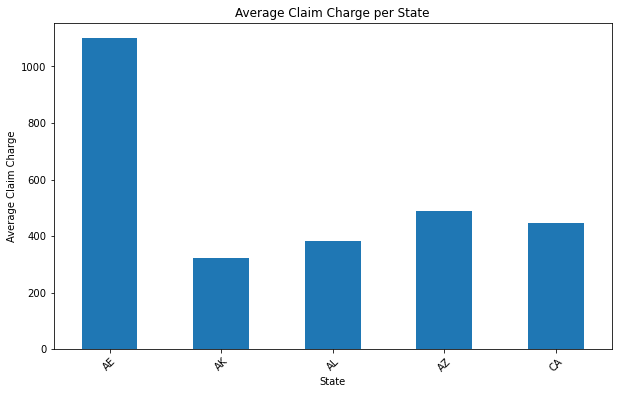

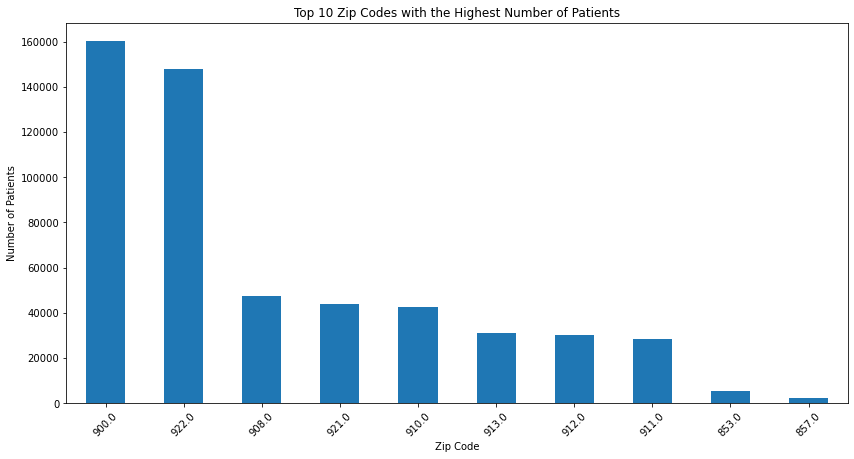

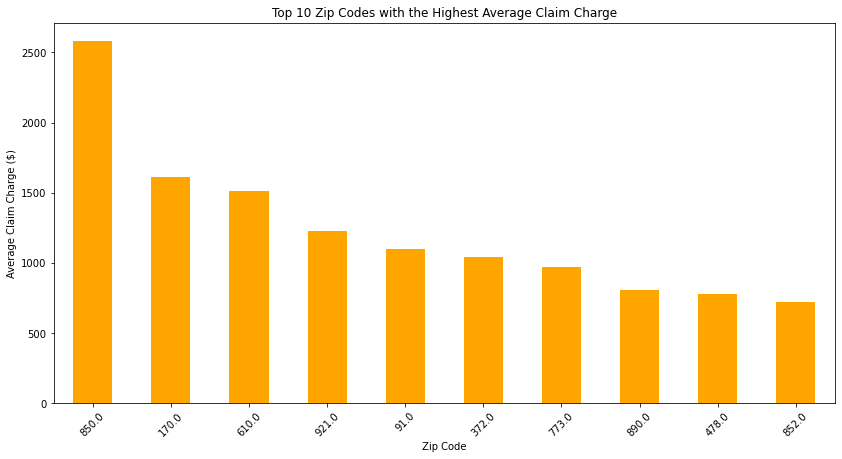

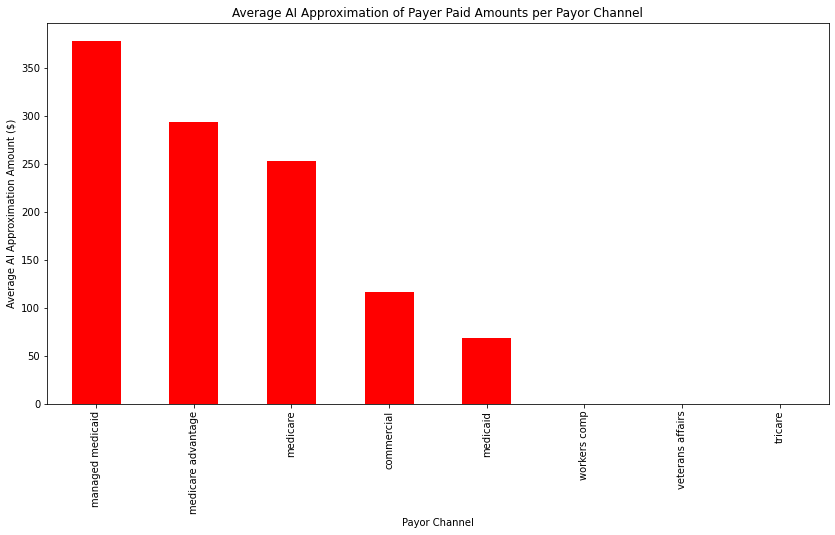

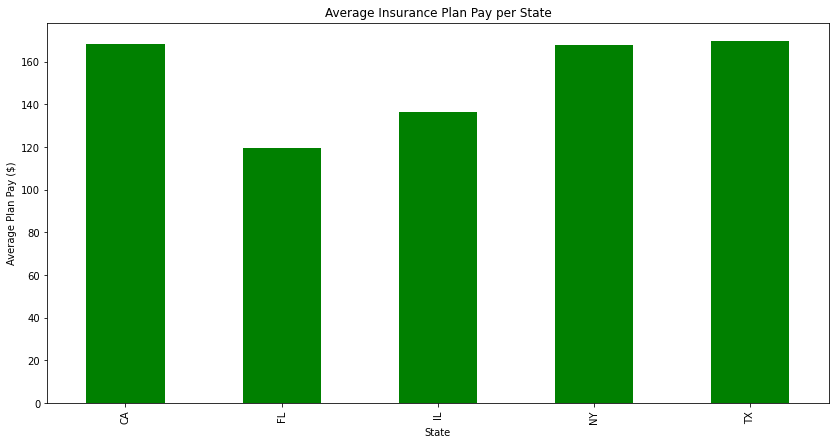

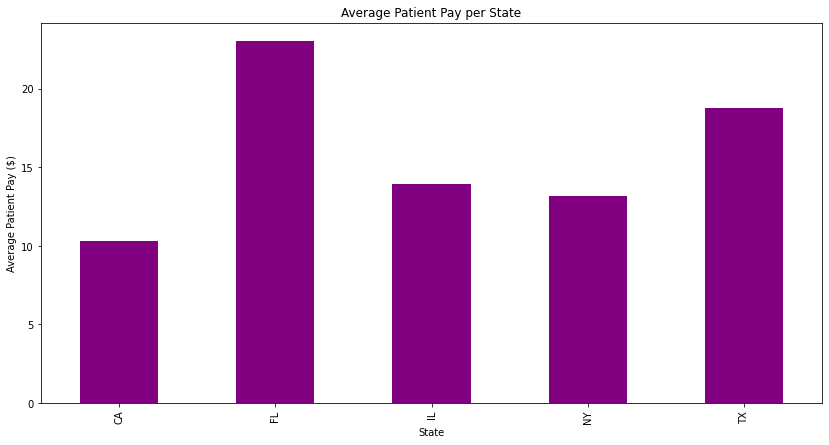

In [44]:
# read original medical and scripts again
original = pd.read_csv('C:/Users/win/Desktop/medical.csv')
original = original.drop_duplicates()
original = original[(original['patient_age'] >= 40) & (original['patient_age'] <= 75)]

prescription = pd.read_csv('C:/Users/win/Desktop/scripts.csv')
prescription = prescription.drop_duplicates()

# average claim charge
avg_claim_charge_state = original.groupby('patient_state')['claim_charge'].mean()

# bar plot for the average claim charge per state
avg_claim_charge_state.plot(kind='bar', figsize=(10, 6))
plt.title('Average Claim Charge per State')
plt.xlabel('State')
plt.ylabel('Average Claim Charge')
plt.xticks(rotation=45)
plt.show()

# change the patient_short_zip's format into string
original['patient_short_zip'] = original['patient_short_zip'].astype(str)

# the number of patients per zip code
patients_per_zip = original.groupby('patient_short_zip').size().sort_values(ascending=False)
avg_claim_charge_zip = original.groupby('patient_short_zip')['claim_charge'].mean().sort_values(ascending=False)

# choose top 10 number of Patients
patients_per_zip.head(10).plot(kind='bar', figsize=(14, 7))
plt.title('Top 10 Zip Codes with the Highest Number of Patients')
plt.xlabel('Zip Code')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

# top 10 Average Claim Charge
avg_claim_charge_zip.head(10).plot(kind='bar', color='orange', figsize=(14, 7))
plt.title('Top 10 Zip Codes with the Highest Average Claim Charge')
plt.xlabel('Zip Code')
plt.ylabel('Average Claim Charge ($)')
plt.xticks(rotation=45)
plt.show()

# average smart_allowed per payor channel
avg_smart_allowed_per_channel = original.groupby('payor_channel')['smart_allowed'].mean().sort_values(ascending=False)

# bar plot
avg_smart_allowed_per_channel.plot(kind='bar', figsize=(14, 7), color='red')
plt.title('Average AI Approximation of Payer Paid Amounts per Payor Channel')
plt.xlabel('Payor Channel')
plt.ylabel('Average AI Approximation Amount ($)')
plt.xticks(rotation=90)
plt.show()

# average plan pay per state
avg_plan_pay_per_state = prescription.groupby('patient_state')['plan_pay'].mean()
avg_plan_pay_per_state.plot(kind='bar', figsize=(14, 7), color='green')
plt.title('Average Insurance Plan Pay per State')
plt.xlabel('State')
plt.ylabel('Average Plan Pay ($)')
plt.xticks(rotation=90)
plt.show()

# average patient pay per state
avg_patient_pay_per_state = prescription.groupby('patient_state')['patient_pay'].mean()
avg_patient_pay_per_state.plot(kind='bar', figsize=(14, 7), color='purple')
plt.title('Average Patient Pay per State')
plt.xlabel('State')
plt.ylabel('Average Patient Pay ($)')
plt.xticks(rotation=90)
plt.show()

Explanation:

Notably, states designated as "AE" topped the list with unusually high average claim costs. Upon further investigation, it became clear that "AE" stood for U.S. Armed Forces in Europe. This could indicate that military personnel have different insurance coverage, possibly Tricare, which could be the reason for the unusual billing patterns observed. With fewer concerns about out-of-pocket costs, Tricare's universal coverage could result in higher claim costs.

It is notable that California is at the top of the list of ZIP codes with the highest number of patients. A rational explanation for this is that California has a large population and is the most populous state in the U.S., which naturally brings in more patients. This suggests a direct correlation between population density and health care utilization.

There is another interesting thing about the ZIP codes with the highest average claim costs, with Phoenix, Arizona coming in a close second. Phoenix, as a large city, has an extensive healthcare facility infrastructure, which may be a factor in the higher costs. Additionally, socioeconomic factors (e.g., residents generally having high-quality insurance) may also be driving up average claim costs. 

Then about the smart_allowed payments by payer channel, "Managed Medicaid" and "Medicare Advantage" had the highest payments. This is followed by traditional "Medicare," "Commercial," and "Medicaid." Interestingly, in contrast, "Tri-Military Insurance" has lower payments, which is consistent with previous observations that military insurance holders have higher claims costs but potentially lower out-of-pocket costs.


Finally, when looking at insurance program payments versus patient payments by state, California had higher insurance payments and lower patient costs. However, in states such as New York and Texas, despite higher insurance payments, the patient payment burden is significantly higher in Texas. This difference highlights the fact that insurance program structures vary widely and can have a deep effect on patient costs.

In conclusion, our analysis suggests that demographic factors, particularly geographic location, play a significant role in health care finances. The state or zip code of residence and treatment can have a deep effect on the direct costs that patients incur, highlighting the importance of geographic location in healthcare financial analysis.